In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan visualisasi default
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 1. Memuat data
file_name = 'Sample - Superstore.csv'
df = pd.read_csv(file_name, encoding='latin1')

print("--- 5 Baris Pertama Data ---")
print(df.head())
print("\n--- Ringkasan Informasi Data Awal ---")
df.info()

--- 5 Baris Pertama Data ---
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

In [11]:
# 2.1. Konversi Tipe Data
# Mengubah kolom 'Order Date' menjadi format datetime (format data Superstore adalah MM/DD/YYYY)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Menghapus baris jika ada missing value pada kolom kunci
df.dropna(subset=['Sales', 'Quantity', 'Profit', 'Category', 'Region', 'City'], inplace=True) 

# 2.2. Feature Engineering: Ekstraksi Waktu
# Membuat kolom YYYY-MM untuk sorting yang benar pada visualisasi tren
df['Order_YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)
df['Order_Year'] = df['Order Date'].dt.year
df.sort_values(by='Order Date', inplace=True)


--- A. Analisis Tren Penjualan Bulanan ---


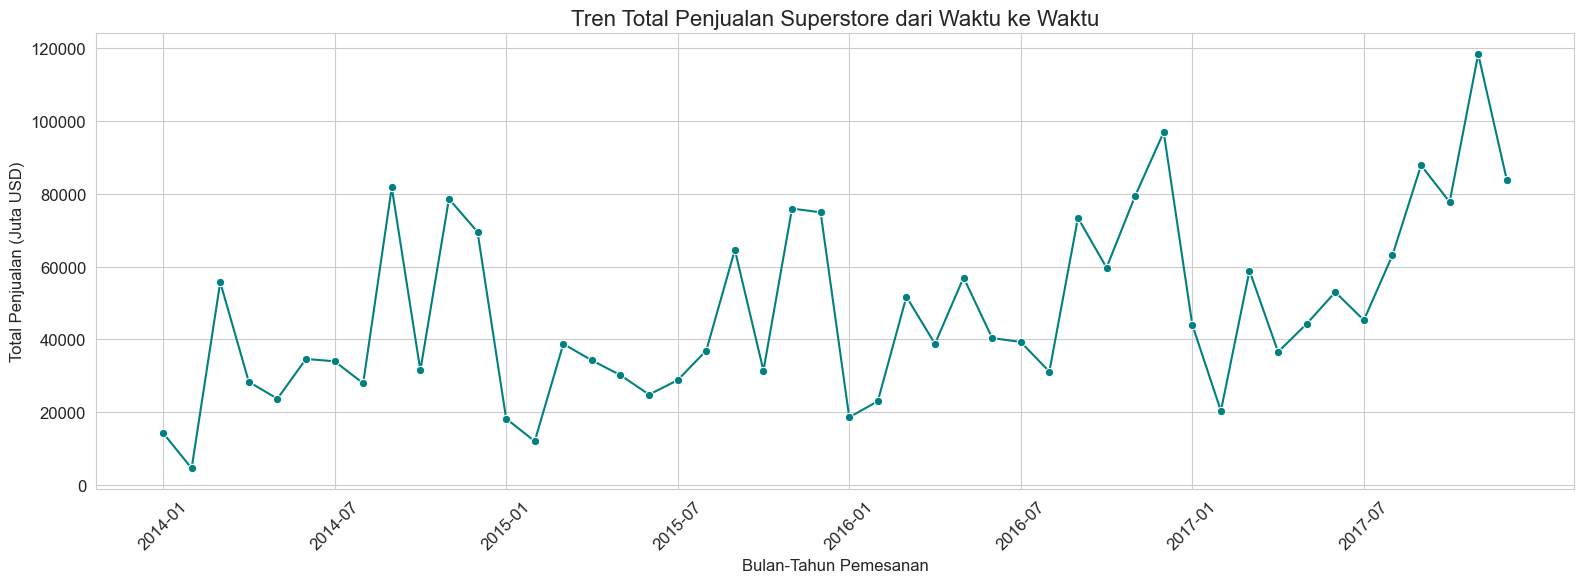

In [12]:
# A. Analisis Tren Waktu (Total Penjualan Bulanan)
print("\n--- A. Analisis Tren Penjualan Bulanan ---")
monthly_sales = df.groupby('Order_YearMonth')['Sales'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='Order_YearMonth', y='Sales', data=monthly_sales, marker='o', color='teal')

# Memberikan label x hanya untuk setiap 6 bulan agar tidak terlalu padat
tick_positions = monthly_sales.index[::6] 
tick_labels = monthly_sales['Order_YearMonth'].iloc[::6]
plt.xticks(tick_positions, tick_labels, rotation=45)

plt.title('Tren Total Penjualan Superstore dari Waktu ke Waktu', fontsize=16)
plt.xlabel('Bulan-Tahun Pemesanan', fontsize=12)
plt.ylabel('Total Penjualan (Juta USD)', fontsize=12)
plt.tight_layout()
plt.show()


--- B. Analisis Margin Keuntungan Berdasarkan Kategori ---


C:\Users\ACER\AppData\Local\Temp\ipykernel_16288\3008642101.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit_Margin', data=category_profit_margin, palette='Spectral')


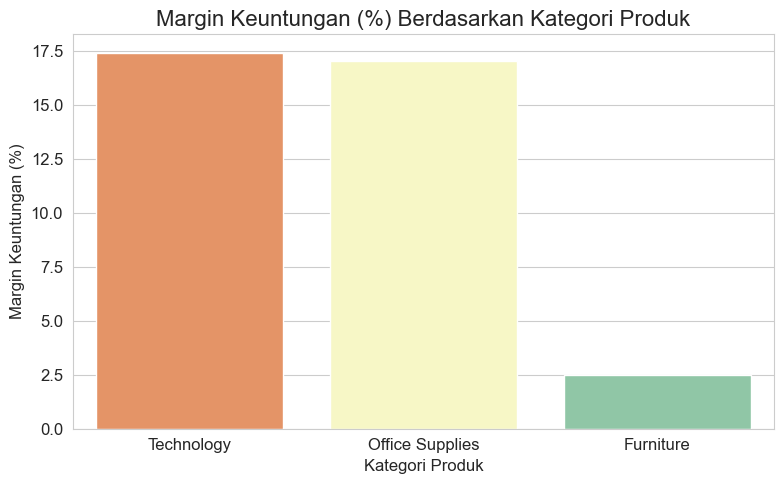


5 Sub-Kategori dengan Kerugian Tertinggi (untuk rekomendasi):
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64


In [13]:
# B. Analisis Kinerja Kategori: Margin Keuntungan (%)
print("\n--- B. Analisis Margin Keuntungan Berdasarkan Kategori ---")

# 1. Hitung total Sales dan Profit per Kategori
category_profit_margin = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# 2. Hitung Margin Keuntungan (%) dan urutkan
category_profit_margin['Profit_Margin'] = (category_profit_margin['Profit'] / category_profit_margin['Sales']) * 100
category_profit_margin.sort_values(by='Profit_Margin', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
# Visualisasi tunggal Margin Keuntungan
sns.barplot(x='Category', y='Profit_Margin', data=category_profit_margin, palette='Spectral') 
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Margin Keuntungan (%) Berdasarkan Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Margin Keuntungan (%)', fontsize=12)
plt.tight_layout()
plt.show()

# Insight Tambahan: Sub-Kategori yang paling merugi
loss_sub_category = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(5)
print("\n5 Sub-Kategori dengan Kerugian Tertinggi (untuk rekomendasi):")
print(loss_sub_category)


--- C. Analisis Penjualan Berdasarkan Wilayah (Region) ---


C:\Users\ACER\AppData\Local\Temp\ipykernel_16288\1621642582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, palette='magma')


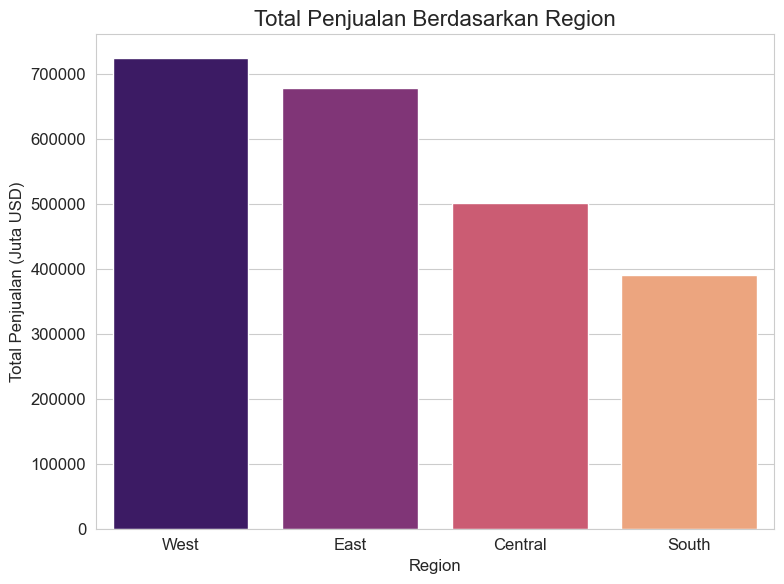

In [14]:
# C. Analisis Penjualan Berdasarkan Wilayah (Region)
print("\n--- C. Analisis Penjualan Berdasarkan Wilayah (Region) ---")
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='magma')
plt.title('Total Penjualan Berdasarkan Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Penjualan (Juta USD)', fontsize=12)
plt.tight_layout()
plt.show()


--- D. Analisis Profit Berdasarkan Segmen Pelanggan ---


C:\Users\ACER\AppData\Local\Temp\ipykernel_16288\2333967010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='rocket')


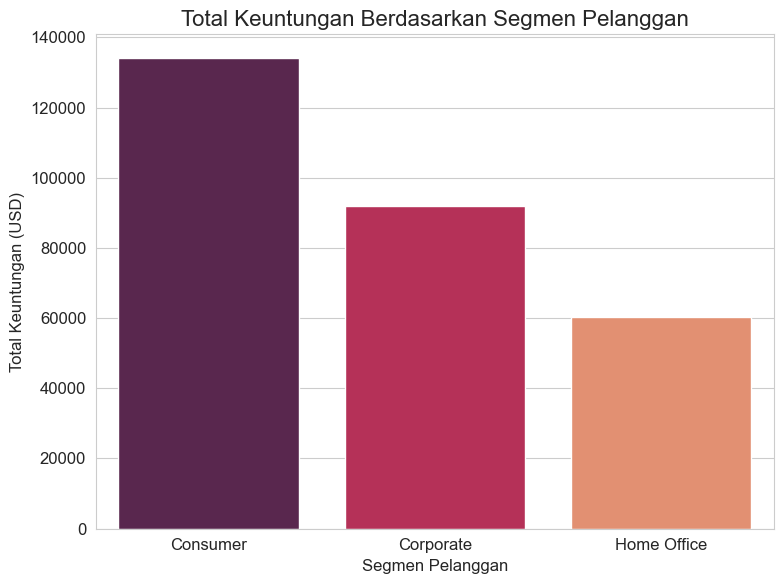


Keuntungan Rata-Rata per Pesanan (Order ID) Berdasarkan Segmen:
Segment
Consumer       51.863577
Corporate      60.752400
Home Office    66.335180
dtype: float64


In [15]:
# D. Analisis Profitabilitas Berdasarkan Segmen Pelanggan
print("\n--- D. Analisis Profit Berdasarkan Segmen Pelanggan ---")
segment_profit = df.groupby('Segment')[['Profit', 'Sales']].sum().sort_values(by='Profit', ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='rocket')
plt.title('Total Keuntungan Berdasarkan Segmen Pelanggan', fontsize=16)
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Total Keuntungan (USD)', fontsize=12)
plt.tight_layout()
plt.show()

# Keuntungan Rata-Rata per Pesanan Berdasarkan Segmen
profit_per_segment = df.groupby('Segment')['Profit'].sum() / df.groupby('Segment')['Order ID'].nunique()
print("\nKeuntungan Rata-Rata per Pesanan (Order ID) Berdasarkan Segmen:")
print(profit_per_segment)


--- E. Top 10 Kota Penyumbang Profit ---


C:\Users\ACER\AppData\Local\Temp\ipykernel_16288\4195670924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Profit', data=city_profit, palette='flare')


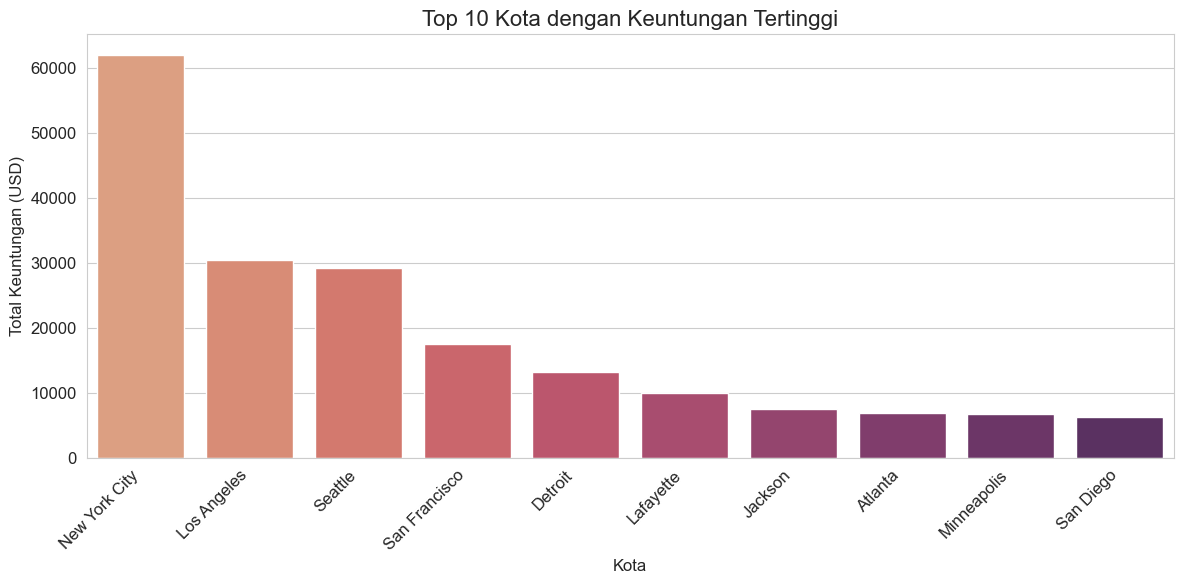


5 Kota Penyumbang Kerugian Terbesar:
           City      Profit
0  Philadelphia -13837.7674
1       Houston -10153.5485
2   San Antonio  -7299.0502
3     Lancaster  -7239.0684
4       Chicago  -6654.5688


In [16]:
# E. Top 10 Kota Penyumbang Profit (dan Kerugian)
print("\n--- E. Top 10 Kota Penyumbang Profit ---")
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Profit', data=city_profit, palette='flare')
plt.title('Top 10 Kota dengan Keuntungan Tertinggi', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Total Keuntungan (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cari 5 kota penyumbang Kerugian terbesar
city_loss = df.groupby('City')['Profit'].sum().sort_values(ascending=True).head(5).reset_index()
print("\n5 Kota Penyumbang Kerugian Terbesar:")
print(city_loss)

In [17]:
# F. Ringkasan Angka Kunci Akhir
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
top_category = category_profit_margin.iloc[0]['Category']

print("\n--- Ringkasan Angka Kunci Akhir ---")
print(f"Total Penjualan Keseluruhan: $ {total_sales:,.2f}")
print(f"Total Keuntungan Keseluruhan: $ {total_profit:,.2f}")
print(f"Rata-rata Profit Margin: {profit_margin:.2f}%")
print(f"Kategori Paling Menguntungkan (berdasarkan Margin): {top_category}")


--- Ringkasan Angka Kunci Akhir ---
Total Penjualan Keseluruhan: $ 2,297,200.86
Total Keuntungan Keseluruhan: $ 286,397.02
Rata-rata Profit Margin: 12.47%
Kategori Paling Menguntungkan (berdasarkan Margin): Technology
